In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [3]:
def e_autocow(xt, h):
    n = len(xt)
    mu = np.mean(xt)
    sum = (
        1
        / n
        * np.sum(
            np.array([(xt[i + abs(h)] - mu) * (xt[i] - mu) for i in range(n - abs(h))])
        )
    )
    return sum


def e_autocor(xt, h):
    return e_autocow(xt, h) / e_autocow(xt, 0)

### Przygotowanie danych

In [4]:
sns.set()

In [5]:
data = pd.read_csv("eurpln.csv")

In [6]:
price = np.array(data["Open"])
date = np.array(data["Date"])

In [7]:
# price = price[-365:]
# date = date[-365:]

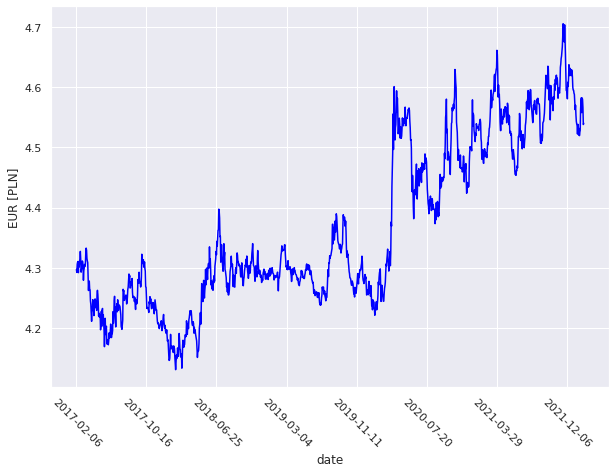

In [77]:
plt.figure(figsize=(10, 7))
plt.plot(price, color="blue")
# plt.title("Raw data", fontsize=18)
plt.xlabel("date")
plt.ylabel("EUR [PLN]")
plt.xticks(
    np.arange(0, len(price), 180),
    [date[i] for i in np.arange(0, len(price), 180)],
    rotation=-45,
)
plt.savefig("data.png", dpi=500)
plt.show()

# Usuwanie NAN

In [9]:
nan_index_list = np.argwhere(np.isnan(price))
for i in nan_index_list:
    price[i] = (price[i - 1] + price[i + 1]) / 2
np.savetxt("new_price.txt", price)

### Statystyki

In [10]:
mean = np.mean(price)
mean

4.366039915708813

In [11]:
var = np.var(price)
var

0.019127860313134654

In [12]:
std = np.sqrt(var)
std

0.1383035079567205

In [13]:
median = np.quantile(price, 0.5)
median

4.3051

In [14]:
Q1 = np.quantile(price, 0.25)
Q1

4.2626

In [15]:
Q3 = np.quantile(price, 0.75)
Q3

4.49917

In [16]:
4.580 - 4.481

0.0990000000000002

In [17]:
IQR = Q3 - Q1
IQR

0.2365700000000004

### Trend

In [18]:
X = np.array(list(range(len(price))))

In [19]:
fit = np.polyfit(X, price, 1)

In [20]:
a, b = fit[0], fit[1]

In [21]:
Y = a * X + b

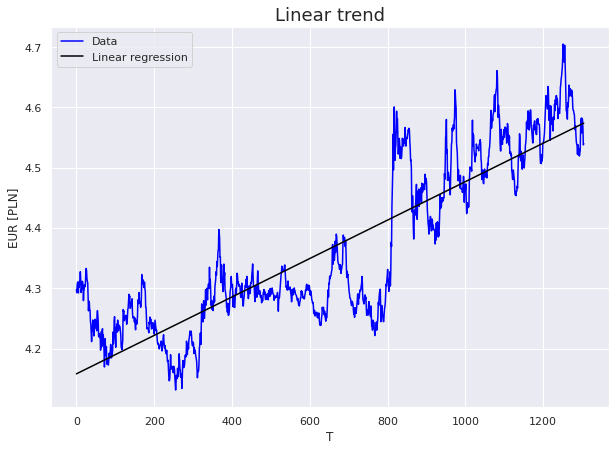

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(price, color="blue", label="Data")
plt.plot(X, Y, color="black", label="Linear regression")
plt.title("Linear trend", fontsize=18)
plt.xlabel("T")
plt.ylabel("EUR [PLN]")
plt.legend()
plt.savefig("regression.png", dpi=500)

In [23]:
Y1 = price - Y

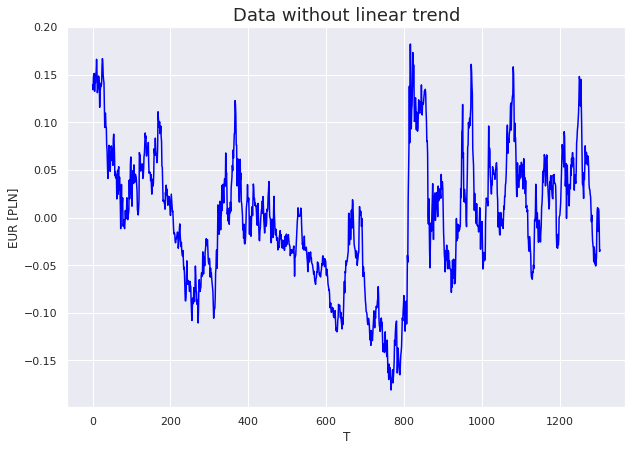

In [24]:
plt.figure(figsize=(10, 7))
plt.plot(Y1, color="blue")
plt.title("Data without linear trend", fontsize=18)
plt.xlabel("T")
plt.ylabel("EUR [PLN]")
plt.savefig("trend.png", dpi=500)

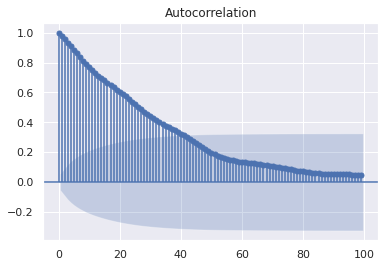

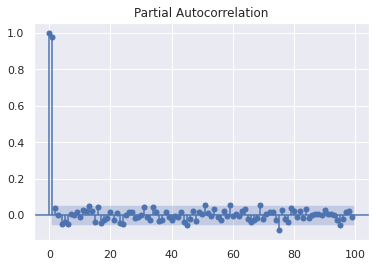

In [25]:
plot_acf(Y1, lags=range(100))
plt.show()
plot_pacf(Y1, lags=range(100))
plt.show()

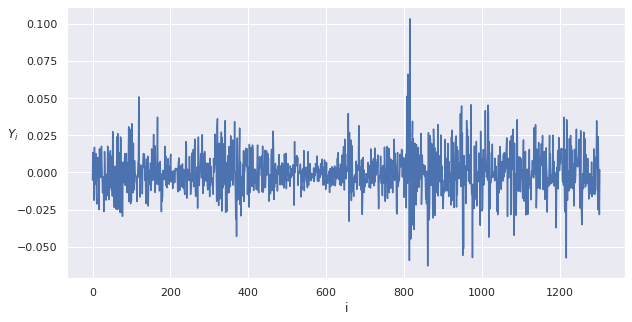

In [78]:
m = 1
ruznicowanie1 = [Y1[i] - Y1[i - m] for i in range(m, len(Y1))]
plt.figure(figsize=(10, 5))
plt.plot((ruznicowanie1))
stats.kstest((ruznicowanie1), "norm")
plt.ylabel("$Y_i$", rotation=0)
plt.xlabel("i")
np.savetxt("ruznicowanie1.txt", ruznicowanie1)
plt.savefig("trend.png", dpi=500)

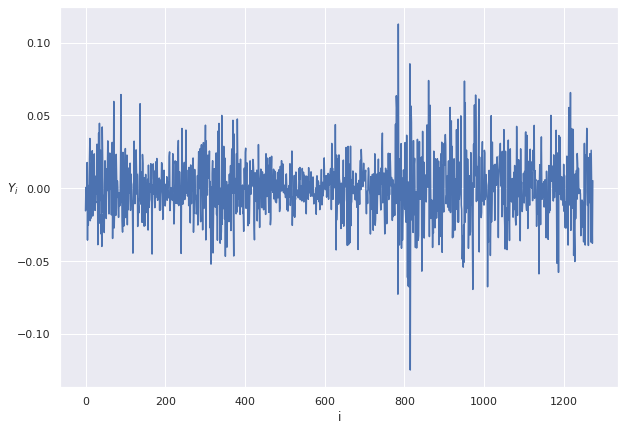

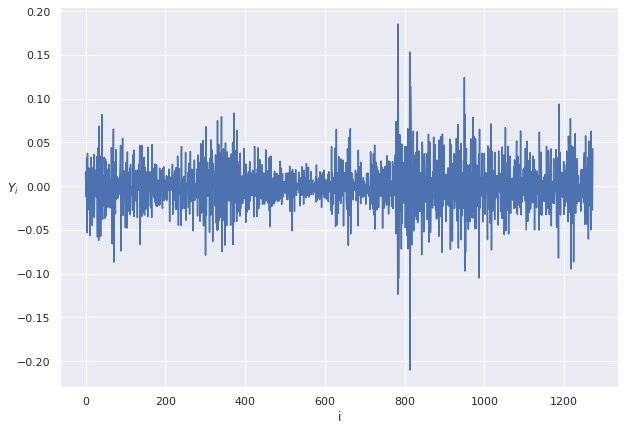

In [28]:
m = 1
ruznicowanie3 = [
    ruznicowanie2[i] - ruznicowanie2[i - m] for i in range(m, len(ruznicowanie2))
]
plt.figure(figsize=(10, 7))
plt.plot((ruznicowanie3))
stats.kstest((ruznicowanie3), "norm")
plt.ylabel("$Y_i$", rotation=0)
plt.xlabel("i")
np.savetxt("ruznicowanie1.txt", ruznicowanie3)
plt.savefig("trend.png", dpi=500)

In [29]:
# model = ARIMA(ruznicowanie1,order=(6,0,2))
# res = model.fit()
model = ARIMA(ruznicowanie1, order=(7, 0, 6))
res = model.fit()

/home/olek/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


No handles with labels found to put in legend.


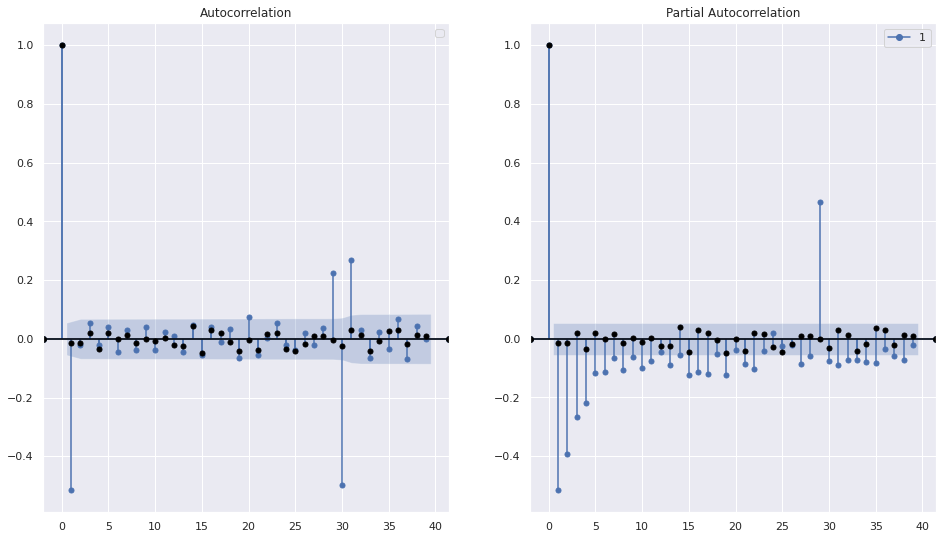

In [ ]:

hs = range(40)
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
plot_acf(ruznicowanie3, lags=hs, ax=ax[0], marker="o")
plot_acf(res.resid, lags=hs, ax=ax[0], marker="o", alpha=1, color="black")
ax[0].legend()

plot_pacf(ruznicowanie3, lags=hs, ax=ax[1], marker="o")
plot_pacf(
    res.resid, lags=hs, ax=ax[1], marker="o", alpha=1, color="black", label="hello"
)

blank = matplotlib.patches.Rectangle(
    (0, 0), 0, 0, fill=False, edgecolor="none", visible=False
)

ax[1].legend(
    [
        1,
    ]
)
plt.show()

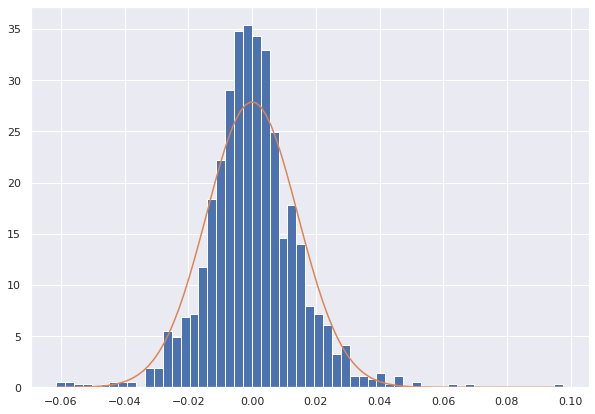

In [31]:
plt.figure(figsize=(10, 7))
plt.hist(res.resid, density=True, bins="auto")
resid = res.resid[1:]
xs = np.linspace(min(resid), max(resid), 100)
plt.plot(xs, stats.norm.pdf(xs, loc=0, scale=np.std(resid)))
plt.show()

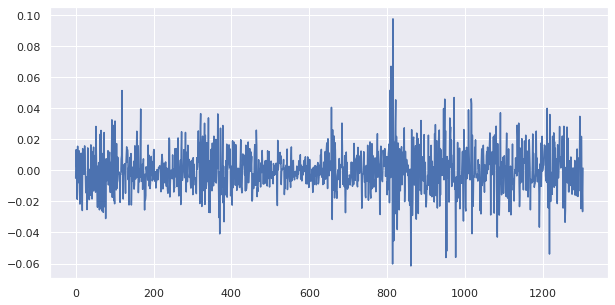

In [79]:
resid = res.resid
plt.figure(figsize=(10, 5))
plt.plot(resid)
plt.savefig("residuum.png")
plt.show()

No handles with labels found to put in legend.


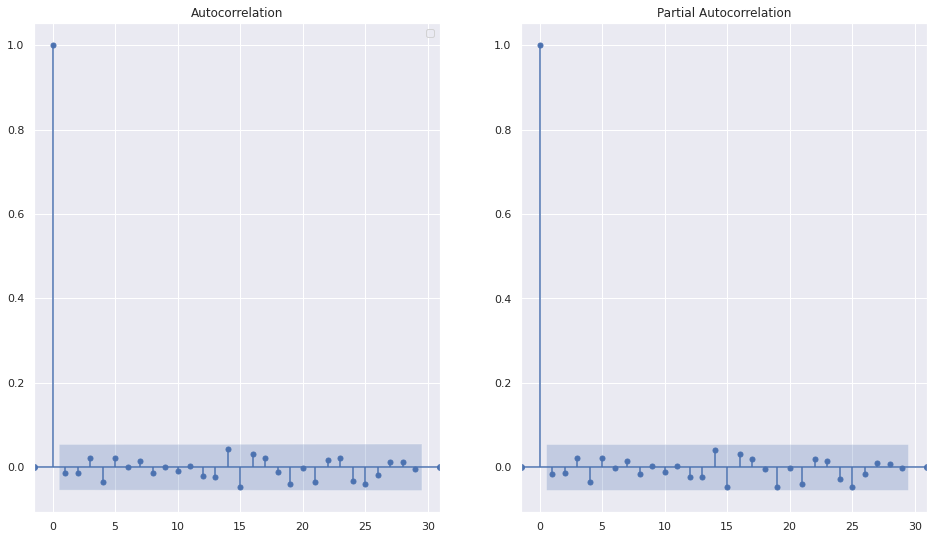

In [ ]:
hs = range(30)
fig, ax = plt.subplots(1, 2, figsize=(16, 9))
plot_acf(res.resid, lags=hs, ax=ax[0], marker="o")
ax[0].legend()

plot_pacf(res.resid, lags=hs, ax=ax[1], marker="o", label="hello")

blank = matplotlib.patches.Rectangle(
    (0, 0), 0, 0, fill=False, edgecolor="none", visible=False
)
plt.show()

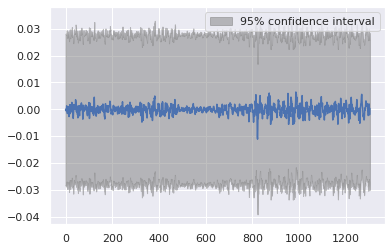

In [34]:
plot_predict(res)
plt.show()

In [35]:
from statsmodels.tsa.arima_process import ArmaProcess

arparams = [1, 0.178158, 0.572810, -0.337375, 0.632793, 0.214153, -0.885537]
maparams = [
    1,
    -0.235259,
    -0.542868,
    0.402289,
    -0.683107,
    -0.145044,
    0.889424,
    -0.109801,
]
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0.9, 0.3])
arma_t = ArmaProcess(arparams, maparams)

In [36]:
arma_t.isinvertible

True

In [37]:
arma_t.isstationary

False

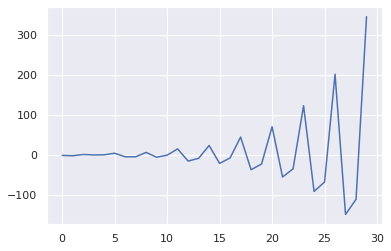

In [38]:
plt.plot(arma_t.generate_sample(nsample=30))

# Analiza danych po tredzie

In [39]:
dane2 = ruznicowanie1

TypeError: savefig() missing 1 required positional argument: 'fname'

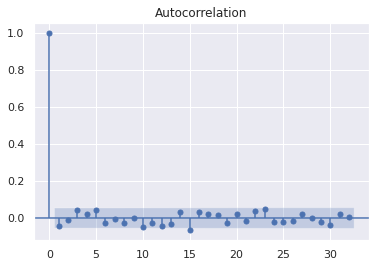

In [38]:
hs = range(0, 41)
# plt.stem(hs,[e_autocor(dane2,i) for i in hs] ,label = "emp. ACV")
plot_acf(np.array(dane2))
plt.savefig()
plt.show()

In [103]:
resid = np.loadtxt("resid.txt")
pd.DataFrame(resid).describe()

,0
count,1.304000e+03
mean,-5.046179e-07
std,1.418660e-02
min,-5.641744e-02
25%,-8.321611e-03
50%,-2.631023e-04
75%,7.292658e-03
max,9.383978e-02


No handles with labels found to put in legend.


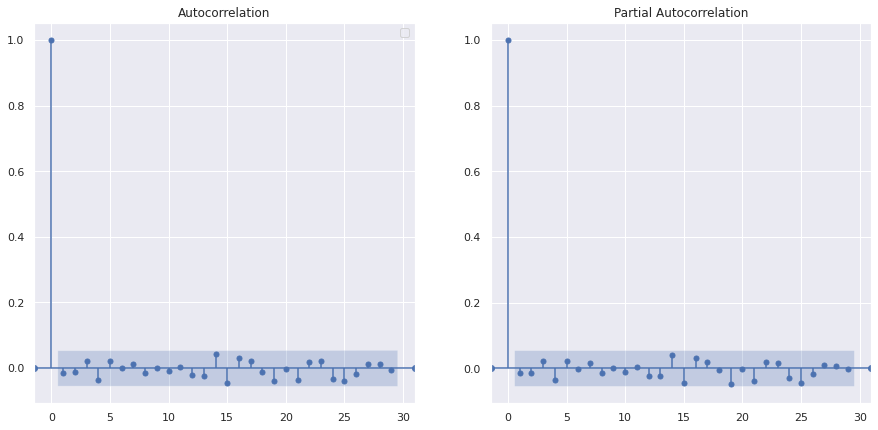

In [ ]:
hs = range(30)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
plot_acf(resid, lags=hs, ax=ax[0], marker="o")
ax[0].legend()

plot_pacf(resid, lags=hs, ax=ax[1], marker="o", label="hello")

blank = matplotlib.patches.Rectangle(
    (0, 0), 0, 0, fill=False, edgecolor="none", visible=False
)
plt.savefig("res_acf_pacf.png")
plt.show()

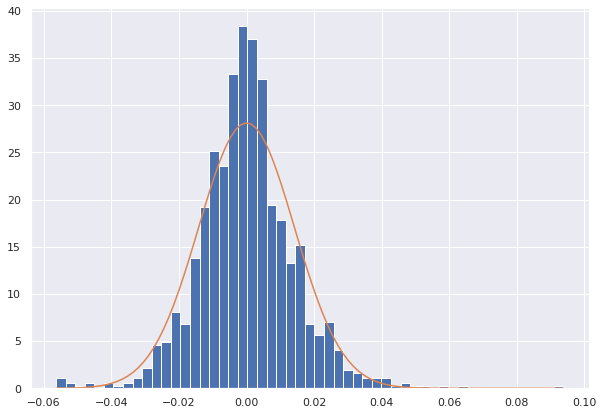

In [71]:
plt.figure(figsize=(10, 7))
plt.hist(resid, density=True, bins="auto")
xs = np.linspace(min(resid), max(resid), 100)
plt.plot(xs, stats.norm.pdf(xs, loc=0, scale=np.std(resid)))
plt.show()

AttributeError: module 'scipy.stats' has no attribute 'ttest'